# IN6227 Data Mining – Assignment 1

## IN6227-2023-Assignment-1.2

## LIU XINWEI (G2103290E)

### Imports

In [1]:
import pandas as pd # data processing
import numpy as np # linear algebra 
import matplotlib.pyplot as plt  # for data visualization
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier # KNN Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
import time
import warnings            
warnings.filterwarnings("ignore") 

### Load Datasets 

In [2]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
              'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
              'hours_per_week', 'native_country', 'wage_class']

In [3]:
train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
                      skiprows = 1, header = None)

train_data.columns = col_labels
test_data.columns = col_labels

In [4]:
train_data.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test_data.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### Data Preprocessing

#### Processing on Data Entries Containing Missing Values 

In [6]:
print('Total row count of Training Dataset {}'.format(len(train_data.index)))
print('Total row count of Test Dataset {}'.format(len(test_data.index)))

Total row count of Training Dataset 32561
Total row count of Test Dataset 16281


In [7]:
def remove_missing_values(data): # Define a method for processing missing values
  col = data.columns
  for c in col:
    data[c] = data[c].replace(' ?', np.NaN)
  data = data.dropna(axis=0, how='any')
  return data

train_data_cleaned = remove_missing_values(train_data)
test_data_cleaned = remove_missing_values(test_data)

In [8]:
print('Total row count of Training Dataset after processing {}'.format(train_data_cleaned.shape[0]))
print('Total row count of Test Dataset after processing {}'.format(test_data_cleaned.shape[0]))

Total row count of Training Dataset after processing 30162
Total row count of Test Dataset after processing 15060


#### Set Categorical Attributes to Numerical Attributes

In [9]:
def judge_wage_class(): # Define a method for juding wage class
    train_data_cleaned['wage_class'] = train_data_cleaned.wage_class.replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})
    test_data_cleaned['wage_class'] = test_data_cleaned.wage_class.replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})
    train_data_cleaned.wage_class.unique()
    test_data_cleaned.wage_class.unique()

In [10]:
judge_wage_class()

#### Label Encoder Transformation

In [11]:
for c in train_data_cleaned.columns:
    le = preprocessing.LabelEncoder()
    le.fit(pd.concat([train_data_cleaned[c], test_data_cleaned[c]]))
    train_data_cleaned[c] = le.transform(train_data_cleaned[c])
    test_data_cleaned[c] = le.transform(test_data_cleaned[c])

In [12]:
train_data_cleaned.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,22,5,3217,9,12,4,0,1,4,1,26,0,39,38,0
1,33,4,3519,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,17196,11,8,0,5,1,4,1,0,0,39,38,0


In [13]:
test_data_cleaned.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,8,2,18119,1,6,4,6,3,2,1,0,0,39,38,0
1,21,2,3913,11,8,2,4,0,4,1,0,0,49,38,0
2,11,1,23770,7,11,2,10,0,4,1,0,0,39,38,1


#### Remove Irrelevant Feature Columns

In [14]:
train_data_cleaned = train_data_cleaned.drop(['fnlwgt'], axis=1)
test_data_cleaned = test_data_cleaned.drop(['fnlwgt'], axis=1)

#### Get Train Dataset and Test Dataset

In [15]:
x_train = train_data_cleaned.drop(['wage_class'], axis=1)
x_test = test_data_cleaned.drop(['wage_class'], axis=1)
y_train = train_data_cleaned.pop('wage_class')
y_test = test_data_cleaned.pop('wage_class')

In [16]:
x_train.head(5)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,22,5,9,12,4,0,1,4,1,26,0,39,38
1,33,4,9,12,2,3,0,4,1,0,0,12,38
2,21,2,11,8,0,5,1,4,1,0,0,39,38
3,36,2,1,6,2,5,0,2,1,0,0,39,38
4,11,2,9,12,2,9,5,2,0,0,0,39,4


In [17]:
y_train.head(5)

0    0
1    0
2    0
3    0
4    0
Name: wage_class, dtype: int32

### Training Model - Two Classifiers

In [18]:
def classify(classifier, X_train, Y_train, X_test, Y_test):
  start_time = time.time()
  classifier.fit(X_train, Y_train)
  end_time = time.time() - start_time
  print(f'{end_time:.2f} seconds to train')
  y_pred = classifier.predict(X_test)
  classification_report = metrics.classification_report(Y_test,y_pred)
  print('Precision Value\n{}'.format(classification_report))
  conf_matrix = confusion_matrix(Y_test, y_pred)
  print('Confusion Matrix:\n{}'.format(conf_matrix))

#### Decision Tree Classifier

In [19]:
decision_tree_classifier = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=10)
decision_tree_classifier.fit(x_train, y_train)
y_pred = decision_tree_classifier.predict(x_test)
(y_pred == y_test.values).mean()

0.850199203187251

In [20]:
classify(decision_tree_classifier, x_train, y_train, x_test, y_test)

0.04 seconds to train
Precision Value
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     11360
           1       0.72      0.65      0.68      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.78      0.79     15060
weighted avg       0.85      0.85      0.85     15060

Confusion Matrix:
[[10416   944]
 [ 1312  2388]]


#### K Neighbors Classifier

In [21]:
K_neighbors_classifier = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform')
k_options = list(range(1, 12))
parameters = {'n_neighbors': k_options}
neigh = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters, cv=10, scoring='accuracy')
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
(y_pred == y_test.values).mean()

0.8297476759628154

In [22]:
classify(K_neighbors_classifier, x_train, y_train, x_test, y_test)

0.08 seconds to train
Precision Value
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     11360
           1       0.64      0.60      0.62      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.75      0.75     15060
weighted avg       0.82      0.82      0.82     15060

Confusion Matrix:
[[10118  1242]
 [ 1470  2230]]


### ROC Curve

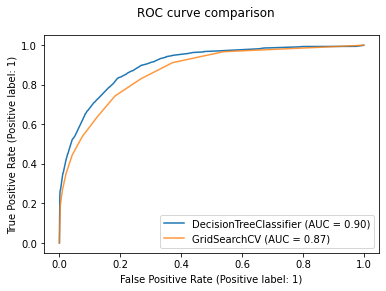

In [23]:
dtc_disp = plot_roc_curve(decision_tree_classifier, x_test, y_test)
dtc_disp.figure_.suptitle("ROC curve comparison")
knc_disp = plot_roc_curve(neigh, x_test, y_test, ax=dtc_disp.ax_, alpha=0.8)
plt.show()